In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Reading in the dataset
mushroom_df = pd.read_csv('agaricus-lepiota.data', names=['edible','cap-shape','cap-surface','cap-color','bruises','odor','gill_attach',
                                                            'gill-spacing','gill-size','gill-color','stalk-shape','stalk-root',
                                                           'stalk-surface_a','stalk-surface-b','stalk-color-a','stalk-color-b',
                                                            'veil-type','veil-color','ring-number','ring-type','spore-print-color',
                                                           'populaton','habitat'])
mushroom_df

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill_attach,gill-spacing,gill-size,gill-color,...,stalk-surface-b,stalk-color-a,stalk-color-b,veil-type,veil-color,ring-number,ring-type,spore-print-color,populaton,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
# Checking if there are null values in the dataset
mushroom_df.isnull().values.any()

False

In [4]:
#One Hot Encoding
mushroom_cleaned_df = pd.get_dummies(mushroom_df)
mushroom_cleaned_df = mushroom_cleaned_df.drop(['edible_p'],axis=1)
mushroom_cleaned_df['edible'] = mushroom_cleaned_df.loc[:,'edible_e']
#Bruises, gill-size, and stalk_shape is binary
mushroom_cleaned_df = mushroom_cleaned_df.drop(['edible_e','bruises_f','gill-size_b','stalk-shape_e'],axis=1)
mushroom_cleaned_df

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,populaton_v,populaton_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,edible
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
8120,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
8122,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

lg_accuracy_train = []
lg_roc_auc_train = []
lg_f1_train = []
lg_precision_train = []

lg_accuracy_test = []
lg_roc_auc_test = []
lg_f1_test = []
lg_precision_test = []

lg_Y_pred_list = []
lg_Y_test_list = []

C_val = [1e-8,1e-7,1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]

# 10 Trials
for i in range(10):
    #Random 5000 per trial
    mushroom_shuffle_df = mushroom_cleaned_df.sample(frac = 1)
    
    #Train and Test set
    X_train,X_test = mushroom_shuffle_df.iloc[:5000,0:-1],mushroom_shuffle_df.iloc[5000:,0:-1]
    Y_train,Y_test = mushroom_shuffle_df.iloc[:5000,-1],mushroom_shuffle_df.iloc[5000:,-1]

    # Create a pipeline - RF is a stand in, we will populate the classifier part below
    pipe = Pipeline([('classifier', LogisticRegression())])

    # Create search space of candidate learning algorithms and their hyperparameters
    # note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
    search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': C_val},
                {'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['lbfgs','sag','newton-cg'],
                 'classifier__penalty': ['l2'],
                 'classifier__C': C_val}
                ]

    # Create grid search 
    clf_lg = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'roc_auc', 'f1','precision'], refit=False,
                   verbose=0,n_jobs=-1)

    # Fit grid search
    best_model = clf_lg.fit(X_train, Y_train)
    
    # Creating a Dataframe to contain the accuracy result per trial
    if i == 0:
        heat_results = pd.DataFrame( best_model.cv_results_['params'])
    # next grab the score resulting from those parameters, add it to the data
    # score is accuracy; to display it as misclassification error we use 1 - x   
    heat_results['score_acc_'+ str(i+1)] = 1 - best_model.cv_results_['mean_test_accuracy'] 
    # get rid of classifier__XX in columns
    cols = heat_results.columns.to_series().str.split('__').apply(lambda x: x[-1])
    heat_results.columns = cols
    
    # Getting the best classifiers
    best_acc_param = (best_model.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_accuracy'])])
    best_roc_auc_param = (best_model.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_roc_auc'])])
    best_f1_param =(best_model.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_f1'])])
    best_precision_param = (best_model.cv_results_['params'][ np.argmin(best_model.cv_results_['rank_test_precision'])])

    # Creating Logistical Regression based on best parameters
    acc_lg_1 = pipe.set_params(**best_acc_param)
    acc_lg = acc_lg_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('LG_ACC Trial #',i,':',acc_lg.score(X_train,Y_train)) # Trainng Raw Scores On 5k Refitting
    lg_accuracy_train.append(acc_lg.score(X_train,Y_train))
    print('LG_ACC Test #',i,':',acc_lg.score(X_test,Y_test)) # Testing Scores
    lg_accuracy_test.append(acc_lg.score(X_test,Y_test))
    
    roc_auc_lg_1 = pipe.set_params(**best_roc_auc_param)
    roc_auc_lg = roc_auc_lg_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('LG_ROC_AUC_OVR Trial #',i,':', roc_auc_score(Y_train,roc_auc_lg.predict_proba(X_train)[:,1])) # Trainng Raw Scores On 5k Refitting
    lg_roc_auc_train.append(roc_auc_score(Y_train,roc_auc_lg.predict_proba(X_train)[:,1]))
    print('LG_ROC_AUC Test #',i,':',roc_auc_score(Y_test,roc_auc_lg.predict_proba(X_test)[:,1])) # Testing Scores
    lg_roc_auc_test.append(roc_auc_score(Y_test,roc_auc_lg.predict_proba(X_test)[:,1]))
    
    #Roc Auc Curve https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
    #Appending each trial together to see the overall ROC curve
    lg_Y_pred_list.append(roc_auc_lg.predict_proba(X_test)[:,1])
    lg_Y_test_list.append(Y_test)
                             
                             
    f1_lg_1 = pipe.set_params(**best_f1_param)
    f1_lg = f1_lg_1.fit(X_train,Y_train) #Retrains on entire 5k samples                  
    print('LG_F1 Trial #',i,':', f1_score(Y_train,f1_lg.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    lg_f1_train.append(f1_score(Y_train,f1_lg.predict(X_train)))                        
    print('LG_F1 Test #',i,':',f1_score(Y_test,f1_lg.predict(X_test))) # Testing Scores
    lg_f1_test.append(f1_score(Y_test,f1_lg.predict(X_test)))                             
                             
    precision_lg_1 =pipe.set_params(**best_precision_param)
    precision_lg =  precision_lg_1.fit(X_train,Y_train) #Retrains on entire 5k sample
    print('LG_Precision Trial #',i,':',average_precision_score(Y_train,precision_lg.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    lg_precision_train.append(average_precision_score(Y_train,precision_lg.predict(X_train)))
    print('LG_Precision Test #',i,':',average_precision_score(Y_test,precision_lg.predict(X_test))) # Testing Scores
    lg_precision_test.append(average_precision_score(Y_test,precision_lg.predict(X_test)))             

LG_ACC Trial # 0 : 1.0
LG_ACC Test # 0 : 1.0
LG_ROC_AUC_OVR Trial # 0 : 1.0
LG_ROC_AUC Test # 0 : 1.0
LG_F1 Trial # 0 : 1.0
LG_F1 Test # 0 : 1.0
LG_Precision Trial # 0 : 1.0
LG_Precision Test # 0 : 1.0
LG_ACC Trial # 1 : 1.0
LG_ACC Test # 1 : 1.0
LG_ROC_AUC_OVR Trial # 1 : 1.0
LG_ROC_AUC Test # 1 : 1.0
LG_F1 Trial # 1 : 1.0
LG_F1 Test # 1 : 1.0
LG_Precision Trial # 1 : 1.0
LG_Precision Test # 1 : 1.0
LG_ACC Trial # 2 : 1.0
LG_ACC Test # 2 : 1.0
LG_ROC_AUC_OVR Trial # 2 : 1.0
LG_ROC_AUC Test # 2 : 1.0
LG_F1 Trial # 2 : 1.0
LG_F1 Test # 2 : 1.0
LG_Precision Trial # 2 : 1.0
LG_Precision Test # 2 : 1.0
LG_ACC Trial # 3 : 1.0
LG_ACC Test # 3 : 1.0
LG_ROC_AUC_OVR Trial # 3 : 1.0
LG_ROC_AUC Test # 3 : 1.0
LG_F1 Trial # 3 : 1.0
LG_F1 Test # 3 : 1.0
LG_Precision Trial # 3 : 1.0
LG_Precision Test # 3 : 1.0
LG_ACC Trial # 4 : 1.0
LG_ACC Test # 4 : 1.0
LG_ROC_AUC_OVR Trial # 4 : 1.0
LG_ROC_AUC Test # 4 : 0.9999999999999999
LG_F1 Trial # 4 : 1.0
LG_F1 Test # 4 : 1.0
LG_Precision Trial # 4 : 1.0
LG_

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

svm_accuracy_train = []
svm_roc_auc_train = []
svm_f1_train = []
svm_precision_train = []

svm_accuracy_test = []
svm_roc_auc_test = []
svm_f1_test = []
svm_precision_test = []

svm_Y_pred_list = []
svm_Y_test_list = []

C_val_svm = [1e-7,1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]

# 10 Trials
for i in range(10):
    #Random 5000 per trial
    mushroom_shuffle_df = mushroom_cleaned_df.sample(frac = 1)
    
    #Train and Test set
    X_train,X_test = mushroom_shuffle_df.iloc[:5000,0:-1],mushroom_shuffle_df.iloc[5000:,0:-1]
    Y_train,Y_test = mushroom_shuffle_df.iloc[:5000,-1],mushroom_shuffle_df.iloc[5000:,-1]

    # Create a pipeline - RF is a stand in, we will populate the classifier part below
    svm_pipe = Pipeline([('svm_classifier', SVC())])

    # Create search space of candidate learning algorithms and their hyperparameters
    # note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
    svm_search_space = [{'svm_classifier': [SVC()],
                 'svm_classifier__kernel': ['poly'],
                 'svm_classifier__degree': [2,3],
                 'svm_classifier__C': C_val_svm},
                {'svm_classifier': [SVC()],
                 'svm_classifier__kernel': ['linear'],
                 'svm_classifier__C': C_val_svm},
                {'svm_classifier': [SVC()],
                 'svm_classifier__kernel': ['rbf'],
                 'svm_classifier__gamma': [.001,.005,.01,.05,.1,.5,1,2],
                 'svm_classifier__C': C_val_svm}
                ]
        
    # Create grid search 
    clf_svm = GridSearchCV(svm_pipe, svm_search_space, cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'roc_auc', 'f1','precision'], refit=False,
                   verbose=0,n_jobs=-1)

    # Fit grid search
    svm_best_model = clf_svm.fit(X_train, Y_train)
    
    #Creating a Dataframe to contain the accuracy result per trial
    if i == 0:
        svm_heat_results = pd.DataFrame( svm_best_model.cv_results_['params'] )
    # next grab the score resulting from those parameters, add it to the data
    # score is accuracy; to display it as misclassification error we use 1 - x   
    svm_heat_results['score_acc_'+ str(i+1)] = 1 - svm_best_model.cv_results_['mean_test_accuracy'] 
    # get rid of classifier__XX in columns
    cols = svm_heat_results.columns.to_series().str.split('__').apply(lambda x: x[-1])
    svm_heat_results.columns = cols
    
    # Getting the best classifiers
    best_acc_param = (svm_best_model.cv_results_['params'][ np.argmin(svm_best_model.cv_results_['rank_test_accuracy'])])
    best_roc_auc_param = (svm_best_model.cv_results_['params'][ np.argmin(svm_best_model.cv_results_['rank_test_roc_auc'])])
    best_f1_param =(svm_best_model.cv_results_['params'][ np.argmin(svm_best_model.cv_results_['rank_test_f1'])])
    best_precision_param = (svm_best_model.cv_results_['params'][ np.argmin(svm_best_model.cv_results_['rank_test_precision'])])

    # Creating Logistical Regression based on best parameters
    acc_svm_1 = svm_pipe.set_params(**best_acc_param)
    acc_svm = acc_svm_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('SVM_ACC Trial #',i,':',acc_svm.score(X_train,Y_train)) # Trainng Raw Scores On 5k Refitting
    svm_accuracy_train.append(acc_svm.score(X_train,Y_train))
    print('SVM_ACC Test #',i,':',acc_svm.score(X_test,Y_test)) # Testing Scores
    svm_accuracy_test.append(acc_svm.score(X_test,Y_test))
    
    #https://stats.stackexchange.com/questions/254710/is-it-better-to-compute-a-roc-curve-using-predicted-probabilities-or-distances-f
    roc_auc_svm_1 = svm_pipe.set_params(**best_roc_auc_param)
    roc_auc_svm = roc_auc_svm_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('SVM_ROC_AUC_OVR Trial #',i,':', roc_auc_score(Y_train,roc_auc_svm.decision_function(X_train))) # Trainng Raw Scores On 5k Refitting
    svm_roc_auc_train.append(roc_auc_score(Y_train,roc_auc_svm.decision_function(X_train)))
    print('SVM_ROC_AUC Test #',i,':',roc_auc_score(Y_test,roc_auc_svm.decision_function(X_test))) # Testing Scores
    svm_roc_auc_test.append(roc_auc_score(Y_test,roc_auc_svm.decision_function(X_test)))                            
                             
    #Roc Auc Curve https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
    svm_Y_pred_list.append(roc_auc_svm.decision_function(X_test))
    svm_Y_test_list.append(Y_test)
    
    f1_svm_1 = svm_pipe.set_params(**best_f1_param)
    f1_svm = f1_svm_1.fit(X_train,Y_train) #Retrains on entire 5k samples                  
    print('SVM_F1 Trial #',i,':', f1_score(Y_train,f1_svm.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    svm_f1_train.append(f1_score(Y_train,f1_svm.predict(X_train)))                        
    print('SVM_F1 Test #',i,':',f1_score(Y_test,f1_svm.predict(X_test))) # Testing Scores
    svm_f1_test.append(f1_score(Y_test,f1_svm.predict(X_test)))                             
                             
    precision_svm_1 = svm_pipe.set_params(**best_precision_param)
    precision_svm =  precision_svm_1.fit(X_train,Y_train) #Retrains on entire 5k sample
    print('SVM_Precision Trial #',i,':',average_precision_score(Y_train,precision_svm.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    svm_precision_train.append(average_precision_score(Y_train,precision_svm.predict(X_train)))
    print('SVM_Precision Test #',i,':',average_precision_score(Y_test,precision_svm.predict(X_test))) # Testing Scores
    svm_precision_test.append(average_precision_score(Y_test,precision_svm.predict(X_test)))  

SVM_ACC Trial # 0 : 1.0
SVM_ACC Test # 0 : 1.0
SVM_ROC_AUC_OVR Trial # 0 : 1.0
SVM_ROC_AUC Test # 0 : 1.0
SVM_F1 Trial # 0 : 1.0
SVM_F1 Test # 0 : 1.0
SVM_Precision Trial # 0 : 1.0
SVM_Precision Test # 0 : 1.0
SVM_ACC Trial # 1 : 1.0
SVM_ACC Test # 1 : 1.0
SVM_ROC_AUC_OVR Trial # 1 : 1.0
SVM_ROC_AUC Test # 1 : 1.0
SVM_F1 Trial # 1 : 1.0
SVM_F1 Test # 1 : 1.0
SVM_Precision Trial # 1 : 1.0
SVM_Precision Test # 1 : 1.0
SVM_ACC Trial # 2 : 1.0
SVM_ACC Test # 2 : 1.0
SVM_ROC_AUC_OVR Trial # 2 : 1.0
SVM_ROC_AUC Test # 2 : 1.0
SVM_F1 Trial # 2 : 1.0
SVM_F1 Test # 2 : 1.0
SVM_Precision Trial # 2 : 1.0
SVM_Precision Test # 2 : 1.0
SVM_ACC Trial # 3 : 1.0
SVM_ACC Test # 3 : 1.0
SVM_ROC_AUC_OVR Trial # 3 : 1.0
SVM_ROC_AUC Test # 3 : 1.0
SVM_F1 Trial # 3 : 1.0
SVM_F1 Test # 3 : 1.0
SVM_Precision Trial # 3 : 1.0
SVM_Precision Test # 3 : 1.0
SVM_ACC Trial # 4 : 1.0
SVM_ACC Test # 4 : 1.0
SVM_ROC_AUC_OVR Trial # 4 : 1.0
SVM_ROC_AUC Test # 4 : 1.0
SVM_F1 Trial # 4 : 1.0
SVM_F1 Test # 4 : 1.0
SVM_Preci

In [7]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

knn_accuracy_train = []
knn_roc_auc_train = []
knn_f1_train = []
knn_precision_train = []

knn_accuracy_test = []
knn_roc_auc_test = []
knn_f1_test = []
knn_precision_test = []

knn_Y_pred_list = []
knn_Y_test_list = []

K_Vals = np.linspace(1,105,26,dtype=int)
weights_list = ['uniform','distance']

# 10 Trials
for i in range(10):
    #Random 5000 per trial
    mushroom_shuffle_df = mushroom_cleaned_df.sample(frac = 1)
    
    #Train and Test set
    X_train,X_test = mushroom_shuffle_df.iloc[:5000,0:-1],mushroom_shuffle_df.iloc[5000:,0:-1]
    Y_train,Y_test = mushroom_shuffle_df.iloc[:5000,-1],mushroom_shuffle_df.iloc[5000:,-1]

    # Create a pipeline - RF is a stand in, we will populate the classifier part below
    # https://stackoverflow.com/questions/34889110/random-forest-with-gridsearchcv-error-on-param-grid
    knn_pipe = Pipeline([('knn_classifier', KNeighborsClassifier())])

    # Create search space of candidate learning algorithms and their hyperparameters
    # note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
    knn_param = {'knn_classifier':[KNeighborsClassifier()],
                 'knn_classifier__n_neighbors':K_Vals,
                 'knn_classifier__weights':weights_list,
                 'knn_classifier__metric':['euclidean']}
        
    # Create grid search 
    clf_knn = GridSearchCV(knn_pipe, knn_param, cv=StratifiedKFold(n_splits=5), 
                           scoring=['accuracy', 'roc_auc', 'f1','precision'], refit=False,
                           verbose=0,n_jobs=-1)

    # Fit grid search
    knn_best_model = clf_knn.fit(X_train, Y_train)
    
    #Creating a Dataframe to contain the accuracy result per trial
    if i == 0:
        knn_heat_results = pd.DataFrame( knn_best_model.cv_results_['params'] )
    # next grab the score resulting from those parameters, add it to the data
    # score is accuracy; to display it as misclassification error we use 1 - x   
    knn_heat_results['score_acc_'+ str(i+1)] = 1 - knn_best_model.cv_results_['mean_test_accuracy'] 
    # get rid of classifier__XX in columns
    cols = knn_heat_results.columns.to_series().str.split('__').apply(lambda x: x[-1])
    knn_heat_results.columns = cols
    
    # Getting the best classifiers
    best_acc_param = (knn_best_model.cv_results_['params'][ np.argmin(knn_best_model.cv_results_['rank_test_accuracy'])])
    best_roc_auc_param = (knn_best_model.cv_results_['params'][ np.argmin(knn_best_model.cv_results_['rank_test_roc_auc'])])
    best_f1_param =(knn_best_model.cv_results_['params'][ np.argmin(knn_best_model.cv_results_['rank_test_f1'])])
    best_precision_param = (knn_best_model.cv_results_['params'][ np.argmin(knn_best_model.cv_results_['rank_test_precision'])])
    
    # Creating KNN based on best parameters
    acc_knn_1 = knn_pipe.set_params(**best_acc_param)
    acc_knn = acc_knn_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('KNN_ACC Trial #',i,':',acc_knn.score(X_train,Y_train)) # Trainng Raw Scores On 5k Refitting
    knn_accuracy_train.append(acc_knn.score(X_train,Y_train))
    print('KNN_ACC Test #',i,':',acc_knn.score(X_test,Y_test)) # Testing Scores
    knn_accuracy_test.append(acc_knn.score(X_test,Y_test))
    
    roc_auc_knn_1 = knn_pipe.set_params(**best_roc_auc_param)
    roc_auc_knn = roc_auc_knn_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('KNN_ROC_AUC_OVR Trial #',i,':', roc_auc_score(Y_train,roc_auc_knn.predict_proba(X_train)[:,1])) # Trainng Raw Scores On 5k Refitting
    knn_roc_auc_train.append(roc_auc_score(Y_train,roc_auc_knn.predict_proba(X_train)[:,1]))
    print('KNN_ROC_AUC Test #',i,':',roc_auc_score(Y_test,roc_auc_knn.predict_proba(X_test)[:,1])) # Testing Scores
    knn_roc_auc_test.append(roc_auc_score(Y_test,roc_auc_knn.predict_proba(X_test)[:,1]))                            
    
    #Roc Auc Curve https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
    knn_Y_pred_list.append(roc_auc_knn.predict_proba(X_test)[:,1])
    knn_Y_test_list.append(Y_test) 
                             
    f1_knn_1 = knn_pipe.set_params(**best_f1_param)
    f1_knn = f1_knn_1.fit(X_train,Y_train) #Retrains on entire 5k samples                  
    print('KNN_F1 Trial #',i,':', f1_score(Y_train,f1_knn.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    knn_f1_train.append(f1_score(Y_train,f1_knn.predict(X_train)))                        
    print('KNN_F1 Test #',i,':',f1_score(Y_test,f1_knn.predict(X_test))) # Testing Scores
    knn_f1_test.append(f1_score(Y_test,f1_knn.predict(X_test)))                             
                             
    precision_knn_1 = knn_pipe.set_params(**best_precision_param)
    precision_knn =  precision_knn_1.fit(X_train,Y_train) #Retrains on entire 5k sample
    print('KNN_Precision Trial #',i,':',average_precision_score(Y_train,precision_knn.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    knn_precision_train.append(average_precision_score(Y_train,precision_knn.predict(X_train)))
    print('KNN_Precision Test #',i,':',average_precision_score(Y_test,precision_knn.predict(X_test))) # Testing Scores
    knn_precision_test.append(average_precision_score(Y_test,precision_knn.predict(X_test)))
  

KNN_ACC Trial # 0 : 1.0
KNN_ACC Test # 0 : 1.0
KNN_ROC_AUC_OVR Trial # 0 : 1.0
KNN_ROC_AUC Test # 0 : 1.0
KNN_F1 Trial # 0 : 1.0
KNN_F1 Test # 0 : 1.0
KNN_Precision Trial # 0 : 1.0
KNN_Precision Test # 0 : 1.0
KNN_ACC Trial # 1 : 1.0
KNN_ACC Test # 1 : 1.0
KNN_ROC_AUC_OVR Trial # 1 : 1.0
KNN_ROC_AUC Test # 1 : 1.0
KNN_F1 Trial # 1 : 1.0
KNN_F1 Test # 1 : 1.0
KNN_Precision Trial # 1 : 1.0
KNN_Precision Test # 1 : 1.0
KNN_ACC Trial # 2 : 1.0
KNN_ACC Test # 2 : 1.0
KNN_ROC_AUC_OVR Trial # 2 : 1.0
KNN_ROC_AUC Test # 2 : 1.0
KNN_F1 Trial # 2 : 1.0
KNN_F1 Test # 2 : 1.0
KNN_Precision Trial # 2 : 1.0
KNN_Precision Test # 2 : 1.0
KNN_ACC Trial # 3 : 1.0
KNN_ACC Test # 3 : 1.0
KNN_ROC_AUC_OVR Trial # 3 : 1.0
KNN_ROC_AUC Test # 3 : 0.9999717000052908
KNN_F1 Trial # 3 : 1.0
KNN_F1 Test # 3 : 1.0
KNN_Precision Trial # 3 : 1.0
KNN_Precision Test # 3 : 1.0
KNN_ACC Trial # 4 : 1.0
KNN_ACC Test # 4 : 1.0
KNN_ROC_AUC_OVR Trial # 4 : 1.0
KNN_ROC_AUC Test # 4 : 1.0
KNN_F1 Trial # 4 : 1.0
KNN_F1 Test # 4 

In [8]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt_accuracy_train = []
dt_roc_auc_train = []
dt_f1_train = []
dt_precision_train = []

dt_accuracy_test = []
dt_roc_auc_test = []
dt_f1_test = []
dt_precision_test = []

dt_Y_pred_list = []
dt_Y_test_list = []

# 10 Trials
for i in range(10):
    #Random 5000 per trial
    mushroom_shuffle_df = mushroom_cleaned_df.sample(frac = 1)
    
    #Train and Test set
    X_train,X_test = mushroom_shuffle_df.iloc[:5000,0:-1],mushroom_shuffle_df.iloc[5000:,0:-1]
    Y_train,Y_test = mushroom_shuffle_df.iloc[:5000,-1],mushroom_shuffle_df.iloc[5000:,-1]


    # https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
    # Create a pipeline - RF is a stand in, we will populate the classifier part below
    # https://stackoverflow.com/questions/34889110/random-forest-with-gridsearchcv-error-on-param-grid
    dt_pipe = Pipeline([('dt_classifier', DecisionTreeClassifier())])

    # Create search space of candidate learning algorithms and their hyperparameters
    # note lbfgs can't do l1, and if you pass penalty='none' it expects no C value
    dt_param = {'dt_classifier':[DecisionTreeClassifier()],
                 'dt_classifier__criterion': ['gini','entropy'],
                 'dt_classifier__ccp_alpha': [.000,.005,.010,.015,.020,.030,.035],
                 'dt_classifier__max_depth':[1,2,3,4,5,6,7,8,9],
               }
    #Locally weighted not necessary - EC
    #Radius Neighbors classifier - EC
    
    # Create grid search 
    clf_dt = GridSearchCV(dt_pipe, dt_param, cv=StratifiedKFold(n_splits=5), 
                           scoring=['accuracy', 'roc_auc', 'f1','precision'], refit=False,
                           verbose=0,n_jobs=-1)

    # Fit grid search
    dt_best_model = clf_dt.fit(X_train, Y_train)
  
    #Creating a Dataframe to contain the accuracy result per trial
    if i == 0:
        dt_heat_results = pd.DataFrame( dt_best_model.cv_results_['params'] )
    # next grab the score resulting from those parameters, add it to the data
    # score is accuracy; to display it as misclassification error we use 1 - x   
    dt_heat_results['score_acc_'+ str(i+1)] = 1 - dt_best_model.cv_results_['mean_test_accuracy'] 
    # get rid of classifier__XX in columns
    cols = dt_heat_results.columns.to_series().str.split('__').apply(lambda x: x[-1])
    dt_heat_results.columns = cols
    
    # Getting the best classifiers
    best_acc_param = (dt_best_model.cv_results_['params'][ np.argmin(dt_best_model.cv_results_['rank_test_accuracy'])])
    best_roc_auc_param = (dt_best_model.cv_results_['params'][ np.argmin(dt_best_model.cv_results_['rank_test_roc_auc'])])
    best_f1_param =(dt_best_model.cv_results_['params'][ np.argmin(dt_best_model.cv_results_['rank_test_f1'])])
    best_precision_param = (dt_best_model.cv_results_['params'][ np.argmin(dt_best_model.cv_results_['rank_test_precision'])])
    
    # Creating DT based on best parameters
    acc_dt_1 = dt_pipe.set_params(**best_acc_param)
    acc_dt = acc_dt_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('DT_ACC Trial #',i,':',acc_dt.score(X_train,Y_train)) # Trainng Raw Scores On 5k Refitting
    dt_accuracy_train.append(acc_dt.score(X_train,Y_train))
    print('DT_ACC Test #',i,':',acc_dt.score(X_test,Y_test)) # Testing Scores
    dt_accuracy_test.append(acc_dt.score(X_test,Y_test))
    
    roc_auc_dt_1 = dt_pipe.set_params(**best_roc_auc_param)
    roc_auc_dt = roc_auc_dt_1.fit(X_train,Y_train) #Retrains on entire 5k samples
    print('DT_ROC_AUC_OVR Trial #',i,':', roc_auc_score(Y_train,roc_auc_dt.predict_proba(X_train)[:,1])) # Trainng Raw Scores On 5k Refitting
    dt_roc_auc_train.append(roc_auc_score(Y_train,roc_auc_dt.predict_proba(X_train)[:,1]))
    print('DT_ROC_AUC Test #',i,':',roc_auc_score(Y_test,roc_auc_dt.predict_proba(X_test)[:,1])) # Testing Scores
    dt_roc_auc_test.append(roc_auc_score(Y_test,roc_auc_dt.predict_proba(X_test)[:,1]))                            
                             
    #Roc Auc Curve https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
    dt_Y_pred_list.append(roc_auc_dt.predict_proba(X_test)[:,1])
    dt_Y_test_list.append(Y_test) 
    
    f1_dt_1 = dt_pipe.set_params(**best_f1_param)
    f1_dt = f1_dt_1.fit(X_train,Y_train) #Retrains on entire 5k samples                  
    print('DT_F1 Trial #',i,':', f1_score(Y_train,f1_dt.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    dt_f1_train.append(f1_score(Y_train,f1_dt.predict(X_train)))                        
    print('DT_F1 Test #',i,':',f1_score(Y_test,f1_dt.predict(X_test))) # Testing Scores
    dt_f1_test.append(f1_score(Y_test,f1_dt.predict(X_test)))                             
                             
    precision_dt_1 = dt_pipe.set_params(**best_precision_param)
    precision_dt =  precision_dt_1.fit(X_train,Y_train) #Retrains on entire 5k sample
    print('DT_Precision Trial #',i,':',average_precision_score(Y_train,precision_dt.predict(X_train))) # Trainng Raw Scores On 5k Refitting
    dt_precision_train.append(average_precision_score(Y_train,precision_dt.predict(X_train)))
    print('DT_Precision Test #',i,':',average_precision_score(Y_test,precision_dt.predict(X_test))) # Testing Scores
    dt_precision_test.append(average_precision_score(Y_test,precision_dt.predict(X_test)))

DT_ACC Trial # 0 : 1.0
DT_ACC Test # 0 : 1.0
DT_ROC_AUC_OVR Trial # 0 : 1.0
DT_ROC_AUC Test # 0 : 1.0
DT_F1 Trial # 0 : 1.0
DT_F1 Test # 0 : 1.0
DT_Precision Trial # 0 : 1.0
DT_Precision Test # 0 : 1.0
DT_ACC Trial # 1 : 1.0
DT_ACC Test # 1 : 1.0
DT_ROC_AUC_OVR Trial # 1 : 1.0
DT_ROC_AUC Test # 1 : 1.0
DT_F1 Trial # 1 : 1.0
DT_F1 Test # 1 : 1.0
DT_Precision Trial # 1 : 1.0
DT_Precision Test # 1 : 1.0
DT_ACC Trial # 2 : 1.0
DT_ACC Test # 2 : 1.0
DT_ROC_AUC_OVR Trial # 2 : 1.0
DT_ROC_AUC Test # 2 : 1.0
DT_F1 Trial # 2 : 1.0
DT_F1 Test # 2 : 1.0
DT_Precision Trial # 2 : 1.0
DT_Precision Test # 2 : 1.0
DT_ACC Trial # 3 : 1.0
DT_ACC Test # 3 : 1.0
DT_ROC_AUC_OVR Trial # 3 : 1.0
DT_ROC_AUC Test # 3 : 1.0
DT_F1 Trial # 3 : 1.0
DT_F1 Test # 3 : 1.0
DT_Precision Trial # 3 : 1.0
DT_Precision Test # 3 : 1.0
DT_ACC Trial # 4 : 1.0
DT_ACC Test # 4 : 1.0
DT_ROC_AUC_OVR Trial # 4 : 1.0
DT_ROC_AUC Test # 4 : 1.0
DT_F1 Trial # 4 : 1.0
DT_F1 Test # 4 : 1.0
DT_Precision Trial # 4 : 1.0
DT_Precision Test 

In [9]:
# Creating Arrays to hold mean metric for each trial
# Logistic Regression
lg_accuracy_train
lg_roc_auc_train
lg_f1_train
lg_precision_train

lg_accuracy_test
lg_roc_auc_test
lg_f1_test
lg_precision_test

# SVM
svm_accuracy_train
svm_roc_auc_train
svm_f1_train
svm_precision_train

svm_accuracy_test
svm_roc_auc_test
svm_f1_test
svm_precision_test

#KNN
knn_accuracy_train
knn_roc_auc_train
knn_f1_train
knn_precision_train

knn_accuracy_test
knn_roc_auc_test
knn_f1_test
knn_precision_test

#DT
dt_accuracy_train
dt_roc_auc_train
dt_f1_train
dt_precision_train

dt_accuracy_test
dt_roc_auc_test
dt_f1_test
dt_precision_test

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9981829194427619,
 1.0,
 0.9987692307692307,
 0.9987349778621126,
 1.0]

In [10]:
Training_List = [lg_accuracy_train,svm_accuracy_train,knn_accuracy_train,dt_accuracy_train,lg_roc_auc_train,svm_roc_auc_train,knn_roc_auc_train,dt_roc_auc_train,lg_f1_train,svm_f1_train,knn_f1_train,dt_f1_train,lg_precision_train,svm_precision_train,knn_precision_train,dt_precision_train]

In [11]:
Training_Results = pd.DataFrame(Training_List, index=['LG_ACC','SVM_ACC','KNN_ACC','DT_ACC','LG_ROC_AUC','SVM_ROC_AUC','KNN_ROC_AUC','DT_ROC_AUC','LG_F1','SVM_F1','KNN_F1','DT_F1','LG_PRECISION','SVM_PRECISION','KNN_PRECISION','DT_PRECISION'],
                                columns=['Training_Trial_1','Training_Trial_2','Training_Trial_3','Training_Trial_4','Training_Trial_5','Training_Trial_6','Training_Trial_7','Training_Trial_8','Training_Trial_9','Training_Trial_10'])
Training_Results.to_csv("mushroom_training_FINAL.csv")
Training_Results['Training_MEAN'] = Training_Results.mean(axis=1)
Training_Results

,Training_Trial_1,Training_Trial_2,Training_Trial_3,Training_Trial_4,Training_Trial_5,Training_Trial_6,Training_Trial_7,Training_Trial_8,Training_Trial_9,Training_Trial_10,Training_MEAN
LG_ACC,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.00000,1.0,1.000000
SVM_ACC,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.00000,1.0,1.000000
KNN_ACC,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.00000,1.0,1.000000
DT_ACC,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999800,0.99960,1.0,0.999940
LG_ROC_AUC,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.00000,1.0,1.000000
SVM_ROC_AUC,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.00000,1.0,1.000000
KNN_ROC_AUC,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.00000,1.0,1.000000
DT_ROC_AUC,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.999991,1.00000,1.0,0.999999
LG_F1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.00000,1.0,1.000000
SVM_F1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.00000,1.0,1.000000


In [12]:
Testing_List = [lg_accuracy_test,svm_accuracy_test,knn_accuracy_test,dt_accuracy_test,lg_roc_auc_test,svm_roc_auc_test,knn_roc_auc_test,dt_roc_auc_test,lg_f1_test,svm_f1_test,knn_f1_test,dt_f1_test,lg_precision_test,svm_precision_test,knn_precision_test,dt_precision_test]

In [13]:
Testing_Results = pd.DataFrame(Testing_List, index=['LG_ACC','SVM_ACC','KNN_ACC','DT_ACC','LG_ROC_AUC','SVM_ROC_AUC','KNN_ROC_AUC','DT_ROC_AUC','LG_F1','SVM_F1','KNN_F1','DT_F1','LG_PRECISION','SVM_PRECISION','KNN_PRECISION','DT_PRECISION'],
                               columns=['Test_Trial_1','Test_Trial_2','Test_Trial_3','Test_Trial_4','Test_Trial_5','Test_Trial_6','Test_Trial_7','Test_Trial_8','Test_Trial_9','Test_Trial_10'])
Testing_Results.to_csv("mushroom_testing_FINAL.csv")
Testing_Results['Test_MEAN'] = Testing_Results.mean(axis=1)
Testing_Results

,Test_Trial_1,Test_Trial_2,Test_Trial_3,Test_Trial_4,Test_Trial_5,Test_Trial_6,Test_Trial_7,Test_Trial_8,Test_Trial_9,Test_Trial_10,Test_MEAN
LG_ACC,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.000000,1.0,1.000000
SVM_ACC,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.000000,1.0,1.000000
KNN_ACC,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.000000,1.0,1.000000
DT_ACC,1.0,1.0,1.0,1.000000,1.0,0.999040,1.0,0.999360,0.999360,1.0,0.999776
LG_ROC_AUC,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.000000,1.0,1.000000
SVM_ROC_AUC,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.000000,1.0,1.000000
KNN_ROC_AUC,1.0,1.0,1.0,0.999972,1.0,1.000000,1.0,1.000000,1.000000,1.0,0.999997
DT_ROC_AUC,1.0,1.0,1.0,1.000000,1.0,0.998984,1.0,0.999969,1.000000,1.0,0.999895
LG_F1,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.000000,1.0,1.000000
SVM_F1,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,1.000000,1.000000,1.0,1.000000


In [14]:
from scipy import stats
stats.ttest_ind(lg_accuracy_train,svm_accuracy_train)

Ttest_indResult(statistic=nan, pvalue=nan)

,classifier,C,penalty,solver,score_acc_1,score_acc_2,score_acc_3,score_acc_4,score_acc_5,score_acc_6,score_acc_7,score_acc_8,score_acc_9,score_acc_10,mean_score_acc
0,"LogisticRegression(C=10.0, max_iter=5000, pena...",1.000000e-08,l1,saga,0.5030,0.498,0.4962,0.497,0.4808,0.4780,0.4900,0.4852,0.488,0.4968,0.49130
1,"LogisticRegression(C=10.0, max_iter=5000, pena...",1.000000e-08,l2,saga,0.4842,0.490,0.4810,0.485,0.4808,0.4780,0.4836,0.4752,0.480,0.4832,0.48210
2,"LogisticRegression(C=10.0, max_iter=5000, pena...",1.000000e-07,l1,saga,0.4906,0.502,0.4886,0.485,0.4960,0.4956,0.4904,0.4952,0.504,0.4964,0.49438
3,"LogisticRegression(C=10.0, max_iter=5000, pena...",1.000000e-07,l2,saga,0.4842,0.490,0.4810,0.485,0.4808,0.4780,0.4836,0.4752,0.480,0.4832,0.48210
4,"LogisticRegression(C=10.0, max_iter=5000, pena...",1.000000e-06,l1,saga,0.5030,0.502,0.4886,0.509,0.4884,0.4956,0.5032,0.4752,0.480,0.4900,0.49350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,LogisticRegression(max_iter=5000),1.000000e+03,l2,sag,0.0000,0.000,0.0002,0.000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.00002
61,LogisticRegression(max_iter=5000),1.000000e+03,l2,newton-cg,0.0000,0.000,0.0002,0.000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.00002
62,LogisticRegression(max_iter=5000),1.000000e+04,l2,lbfgs,0.0000,0.000,0.0002,0.000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.00002
63,LogisticRegression(max_iter=5000),1.000000e+04,l2,sag,0.0000,0.000,0.0002,0.000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.00002


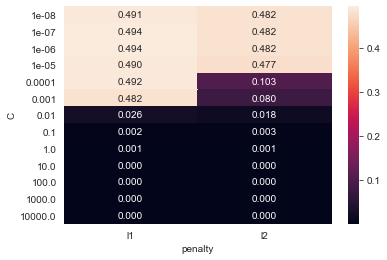

In [15]:
import seaborn as sns; sns.set_style('white')  # plot formatting
# Taking the average of the 5 trials to create 1 heat map based on the averages
heat_results['mean_score_acc'] = heat_results.loc[:,['score_acc_1','score_acc_2','score_acc_3','score_acc_4','score_acc_5','score_acc_6','score_acc_7','score_acc_8','score_acc_9','score_acc_10']].mean(axis=1)

# lets show the results for the saga solver across penalty & C values
sns.heatmap( heat_results.query('solver=="saga"').pivot('C','penalty','mean_score_acc'),
             annot=True, fmt='.3f')
heat_results

,svm_classifier,C,degree,kernel,gamma,score_acc_1,score_acc_2,score_acc_3,score_acc_4,score_acc_5,score_acc_6,score_acc_7,score_acc_8,score_acc_9,score_acc_10,mean_score_acc
0,"SVC(degree=2, kernel='poly')",1.000000e-07,2.0,poly,NaN,0.4862,0.4838,0.4848,0.4896,0.4772,0.4802,0.4868,0.4842,0.4896,0.4826,0.48450
1,"SVC(degree=2, kernel='poly')",1.000000e-07,3.0,poly,NaN,0.4862,0.4838,0.4848,0.4896,0.4772,0.4802,0.4868,0.4842,0.4896,0.4826,0.48450
2,"SVC(degree=2, kernel='poly')",1.000000e-06,2.0,poly,NaN,0.4862,0.4838,0.4848,0.4896,0.4772,0.4802,0.4868,0.4842,0.4896,0.4826,0.48450
3,"SVC(degree=2, kernel='poly')",1.000000e-06,3.0,poly,NaN,0.4862,0.4838,0.4848,0.4896,0.4772,0.4802,0.4868,0.4842,0.4896,0.4826,0.48450
4,"SVC(degree=2, kernel='poly')",1.000000e-05,2.0,poly,NaN,0.4862,0.4838,0.4848,0.4896,0.4772,0.4802,0.4868,0.4842,0.4896,0.4826,0.48450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,SVC(),1.000000e+03,NaN,rbf,0.05,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000
117,SVC(),1.000000e+03,NaN,rbf,0.10,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000
118,SVC(),1.000000e+03,NaN,rbf,0.50,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00000
119,SVC(),1.000000e+03,NaN,rbf,1.00,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0006,0.0002,0.0002,0.0000,0.00012


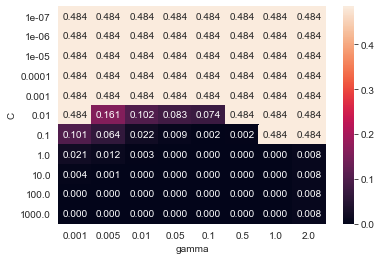

In [16]:
svm_heat_results['mean_score_acc'] = svm_heat_results.loc[:,['score_acc_1','score_acc_2','score_acc_3','score_acc_4','score_acc_5','score_acc_6','score_acc_7','score_acc_8','score_acc_9','score_acc_10']].mean(axis=1)

# lets show the results for the saga solver across penalty & C values
sns.heatmap( svm_heat_results.query('kernel=="rbf"').pivot('C','gamma','mean_score_acc'),
             annot=True, fmt='.3f')
svm_heat_results

,knn_classifier,metric,n_neighbors,weights,score_acc_1,score_acc_2,score_acc_3,score_acc_4,score_acc_5,score_acc_6,score_acc_7,score_acc_8,score_acc_9,score_acc_10,mean_score_acc
0,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,1,uniform,0.0002,0.0000,0.0000,0.0002,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,0.00006
1,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,1,distance,0.0002,0.0000,0.0000,0.0002,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,0.00006
2,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,5,uniform,0.0004,0.0004,0.0000,0.0002,0.0002,0.0000,0.0000,0.0004,0.0000,0.0004,0.00020
3,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,5,distance,0.0004,0.0000,0.0000,0.0002,0.0002,0.0000,0.0000,0.0004,0.0000,0.0000,0.00012
4,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,9,uniform,0.0012,0.0008,0.0008,0.0004,0.0008,0.0008,0.0000,0.0006,0.0008,0.0006,0.00068
5,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,9,distance,0.0004,0.0004,0.0002,0.0002,0.0002,0.0002,0.0000,0.0006,0.0000,0.0006,0.00028
6,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,13,uniform,0.0016,0.0008,0.0010,0.0006,0.0014,0.0010,0.0010,0.0008,0.0008,0.0012,0.00102
7,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,13,distance,0.0008,0.0006,0.0006,0.0004,0.0004,0.0008,0.0000,0.0008,0.0006,0.0006,0.00056
8,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,17,uniform,0.0016,0.0008,0.0010,0.0006,0.0020,0.0012,0.0018,0.0012,0.0008,0.0012,0.00122
9,"KNeighborsClassifier(metric='euclidean', n_nei...",euclidean,17,distance,0.0014,0.0008,0.0008,0.0004,0.0012,0.0008,0.0006,0.0008,0.0006,0.0006,0.00080


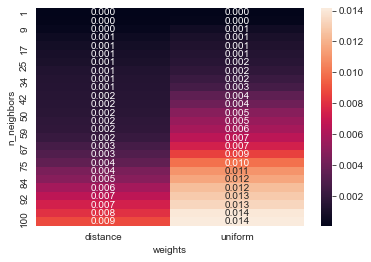

In [17]:
knn_heat_results['mean_score_acc'] = knn_heat_results.loc[:,['score_acc_1','score_acc_2','score_acc_3','score_acc_4','score_acc_5','score_acc_6','score_acc_7','score_acc_8','score_acc_9','score_acc_10']].mean(axis=1)

# lets show the results for the saga solver across penalty & C values
sns.heatmap( knn_heat_results.pivot('n_neighbors','weights','mean_score_acc'),
             annot=True, fmt='.3f')
knn_heat_results

,dt_classifier,ccp_alpha,criterion,max_depth,score_acc_1,score_acc_2,score_acc_3,score_acc_4,score_acc_5,score_acc_6,score_acc_7,score_acc_8,score_acc_9,score_acc_10,mean_score_acc
0,DecisionTreeClassifier(max_depth=7),0.000,gini,1,0.1142,0.1104,0.1176,0.1102,0.1168,0.1096,0.1174,0.1118,0.1134,0.1154,0.11368
1,DecisionTreeClassifier(max_depth=7),0.000,gini,2,0.0424,0.0446,0.0442,0.0446,0.0484,0.0432,0.0446,0.0444,0.0650,0.0464,0.04678
2,DecisionTreeClassifier(max_depth=7),0.000,gini,3,0.0142,0.0156,0.0144,0.0138,0.0154,0.0142,0.0148,0.0162,0.0278,0.0156,0.01620
3,DecisionTreeClassifier(max_depth=7),0.000,gini,4,0.0064,0.0096,0.0062,0.0090,0.0054,0.0074,0.0102,0.0066,0.0022,0.0102,0.00732
4,DecisionTreeClassifier(max_depth=7),0.000,gini,5,0.0022,0.0008,0.0008,0.0006,0.0004,0.0018,0.0010,0.0016,0.0002,0.0012,0.00106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,DecisionTreeClassifier(max_depth=7),0.035,gini,5,0.0286,0.0300,0.0304,0.0314,0.0334,0.0306,0.0294,0.0296,0.0172,0.0316,0.02922
113,DecisionTreeClassifier(max_depth=7),0.035,gini,6,0.0286,0.0300,0.0304,0.0314,0.0334,0.0306,0.0294,0.0296,0.0172,0.0316,0.02922
114,DecisionTreeClassifier(max_depth=7),0.035,gini,7,0.0286,0.0300,0.0304,0.0314,0.0334,0.0306,0.0294,0.0296,0.0172,0.0316,0.02922
115,DecisionTreeClassifier(max_depth=7),0.035,gini,8,0.0286,0.0300,0.0304,0.0314,0.0334,0.0306,0.0294,0.0296,0.0172,0.0316,0.02922


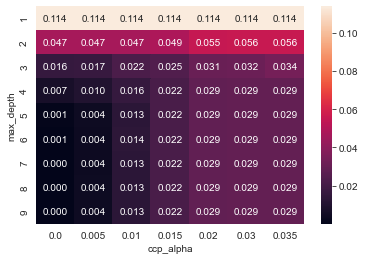

In [18]:
dt_heat_results['mean_score_acc'] = dt_heat_results.loc[:,['score_acc_1','score_acc_2','score_acc_3','score_acc_4','score_acc_5','score_acc_6','score_acc_7','score_acc_8','score_acc_9','score_acc_10']].mean(axis=1)

# lets show the results for the saga solver across penalty & C values
dt_cleaned = dt_heat_results.drop_duplicates(['max_depth','ccp_alpha'])
sns.heatmap( dt_cleaned.pivot('max_depth','ccp_alpha','mean_score_acc'),
             annot=True, fmt='.3f')
dt_cleaned

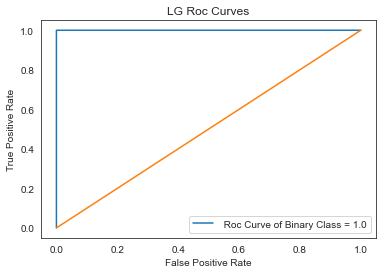

In [19]:
#https://datascience.stackexchange.com/questions/69442/plotting-roc-auc-for-svm-algorithm
from sklearn.metrics import roc_curve, auc
# Concating the list together
lg_Y_test = pd.concat(lg_Y_test_list)
lg_Y_pred = np.concatenate(lg_Y_pred_list)
# Getting the Roc Curve values
test_fpr, test_tpr, test_thresholds = roc_curve(lg_Y_test,lg_Y_pred)
plt.plot(test_fpr, test_tpr, label=" Roc Curve of Binary Class = "+ str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1])
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LG Roc Curves")
plt.show()

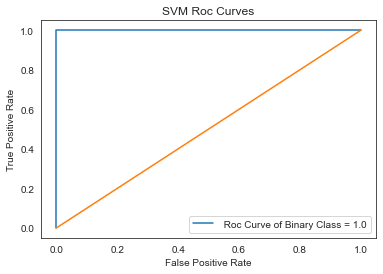

In [20]:
# Concating the list together
svm_Y_test = pd.concat(svm_Y_test_list)
svm_Y_pred = np.concatenate(svm_Y_pred_list)
# Getting the Roc Curve values
test_fpr, test_tpr, test_thresholds = roc_curve(svm_Y_test,svm_Y_pred)
plt.plot(test_fpr, test_tpr, label=" Roc Curve of Binary Class = "+ str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1])
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM Roc Curves")
plt.show()

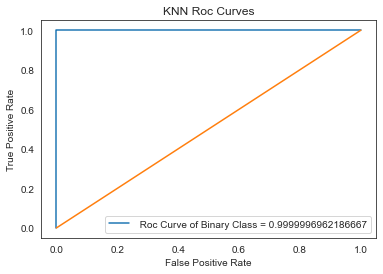

In [21]:
# Concating the list together
knn_Y_test = pd.concat(knn_Y_test_list)
knn_Y_pred = np.concatenate(knn_Y_pred_list)
# Getting the Roc Curve values
test_fpr, test_tpr, test_thresholds = roc_curve(knn_Y_test,knn_Y_pred)
plt.plot(test_fpr, test_tpr, label=" Roc Curve of Binary Class = "+ str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1])
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN Roc Curves")
plt.show()

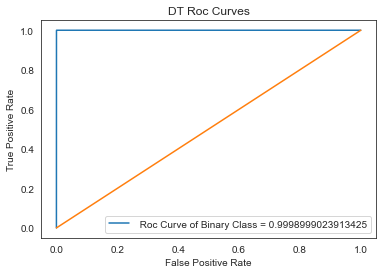

In [22]:
# Concating the list together
dt_Y_test = pd.concat(dt_Y_test_list)
dt_Y_pred = np.concatenate(dt_Y_pred_list)
# Getting the Roc Curve values
test_fpr, test_tpr, test_thresholds = roc_curve(dt_Y_test,dt_Y_pred)
plt.plot(test_fpr, test_tpr, label=" Roc Curve of Binary Class = "+ str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1])
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("DT Roc Curves")
plt.show()